# Connect drive with Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.applications import InceptionV3
from glob import glob

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

from tensorflow.keras.preprocessing import image_dataset_from_directory

### Path to dir

In [ ]:
path_colab_drive = '/content/gdrive/MyDrive/Phân loại hoa - KNN, RF, CNN'

In [ ]:
!cp '{path_colab_drive}/data.zip' /content/data.zip
!unzip /content/data.zip -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/data/train/50/image_06553.jpg  
  inflating: /content/data/train/50/image_06554.jpg  
  inflating: /content/data/train/50/image_06555.jpg  
  inflating: /content/data/train/50/image_06556.jpg  
  inflating: /content/data/train/50/image_06557.jpg  
  inflating: /content/data/train/50/image_06559.jpg  
  inflating: /content/data/train/50/image_06560.jpg  
  inflating: /content/data/train/50/image_06561.jpg  
  inflating: /content/data/train/50/image_06563.jpg  
  inflating: /content/data/train/50/image_06564.jpg  
  inflating: /content/data/train/50/image_06565.jpg  
  inflating: /content/data/train/50/image_06566.jpg  
  inflating: /content/data/train/50/image_06567.jpg  
  inflating: /content/data/train/50/image_06568.jpg  
  inflating: /content/data/train/50/image_06569.jpg  
  inflating: /content/data/train/50/image_06570.jpg  
   creating: /content/data/train/51/
  inflating: /content/data/train/51/image_

###data train, validation path

In [ ]:
train_path = '/content/data/train'
val_path = '/content/data/valid'

## Visualization

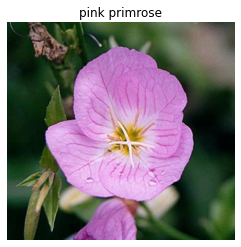

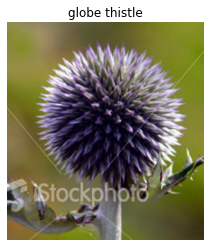

In [ ]:
img = load_img(train_path + "/1/image_06734.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("pink primrose")
plt.show()

plt.figure()

img = load_img(train_path + "/10/image_07087.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("globe thistle")
plt.show()

In [ ]:
className = glob(train_path + "/*")
NumberofClass = len(className)
print("Number of Class:", NumberofClass)

Number of Class: 102


# LOAD DATA FOR MACHINE LEARNING ALGORITHM

In [ ]:
# Create empty train and val sets
images_train = []
labels_train = []

images_val = []
labels_val = []

# Load data in training set
for class_name in os.listdir(train_path):
  dir_each_class = os.path.join(train_path, class_name)
  for filename in os.listdir(dir_each_class):
    img = cv2.imread(os.path.join(dir_each_class,filename))
    if img is not None:
        # Convert image to feature vector
        feature = cv2.resize(img, (32, 32)).flatten()
        images_train.append(feature)
        labels_train.append(int(class_name))  # Image label in file name

# Load data in test set
for class_name in os.listdir(val_path):
  dir_each_class = os.path.join(val_path, class_name)
  for filename in os.listdir(dir_each_class):
    img = cv2.imread(os.path.join(dir_each_class,filename))
    if img is not None:
        # Convert image to feature vector
        feature = cv2.resize(img, (32, 32)).flatten()
        images_val.append(feature)
        labels_val.append(int(class_name))  # image label in file name

print(f"Nums of train {len(images_train)}, nums of label train {len(labels_train)}")
print(f"Nums of val {len(images_val)}, nums of label val {len(labels_val)}")

Nums of train 6552, nums of label train 6552
Nums of val 818, nums of label val 818


# Mô hình KNN

In [ ]:
k = 5  # Number of nearest images used for classification
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(images_train, labels_train)

KNeighborsClassifier()

In [ ]:
label_predict = knn.predict(images_val)
acc = accuracy_score(label_predict, labels_val)

print("ACCURACY OF KNN MODEL is ", acc)

ACCURACY OF KNN MODEL is  0.15892420537897312


# Random Forest Model

In [ ]:
rf = RandomForestClassifier()
rf.fit(images_train, labels_train)

RandomForestClassifier()

In [ ]:
label_predict = rf.predict(images_val)
acc = accuracy_score(label_predict, labels_val)

print("ACCURACY OF RANDOM FOREST MODEL is ", acc)

ACCURACY OF RANDOM FOREST MODEL is  0.25183374083129584


# LOAD DATA FOR DEEP LEARNING ALGORITHM

## Data PREPARE

In [ ]:
# Declare the parameters
batch_size = 200
input_size = 160
initial_epochs = 10
base_learning_rate = 0.0001


BATCH_SIZE = batch_size
IMG_SIZE = (input_size, input_size)

# Create dataset using the "image_dataset_from_directory" function
train_dataset = image_dataset_from_directory(train_path,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(val_path,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(val_path,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

class_names = train_dataset.class_names
num_classes = len(class_names)
print("Class name: ", class_names)

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.
Found 818 files belonging to 102 classes.
Class name:  ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


## DATA AUGMENTATION

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # define AUTOTUNE constant for configuring the amount of data to be buffered during data preparation

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)  # load data and cache configuration
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([  #  process data to enhance the training data
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.experimental.preprocessing.RandomContrast(1),
  tf.keras.layers.experimental.preprocessing.RandomRotation((-1, 0.5)),
  tf.keras.layers.experimental.preprocessing.RandomCrop(160,160),
  tf.keras.layers.GaussianNoise(0.2)
])

# InceptionV3 Model

In [ ]:
preprocess_input = tf.keras.applications.inception_v3.preprocess_input # preprocess the images before feeding into the training model
model_type = tf.keras.applications.InceptionV3  # this variable contains the architecture of Inceptionv3 model

IMG_SHAPE = IMG_SIZE + (3,) #  add a dimension to the RBG color channel representation
base_model = model_type(input_shape=IMG_SHAPE,  #  initialized the inceptionv3 model
                        include_top=False,
                        weights='imagenet')
base_model.trainable = False # freeze the model weights

In [ ]:
image_batch, label_batch = next(iter(train_dataset))  # get a batch of images and labels from the training set (1 batch is being evaluated w 200 images)
feature_batch = base_model(image_batch)  # base_model was initialized earlier to extract features of batch image_batch
print(feature_batch.shape)

(200, 3, 3, 2048)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()  # adding GlobalAveragePooling2D layer
feature_batch_average = global_average_layer(feature_batch)  # calculate average value of the feature maps extracted from base_model

In [ ]:
prediction_layer = tf.keras.layers.Dense(num_classes, name='predict')  # add a fully connected layer w the no of outputs equal to the no of classification classes of the dataset
prediction_batch = prediction_layer(feature_batch_average) # calculate the prob of each classifier based on the feature extracted from inceptionv3 model

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE, name='image_tensor')  # initialize an input to the model w size IMG_SHAPE and variables are named inputs
x = data_augmentation(inputs) # apply a data enhancement techniques to input images
x = preprocess_input(x)  # preprocess the input image x according to the standards of inceptionv3 model
x = base_model(x, training=False) # pass the input image x to the base_model that was initialized earlier
x = global_average_layer(x) # extract important info of the features, forming a single feature vector
x = tf.keras.layers.Dropout(0.2)(x) # ngẫu nhiên tắt một số node trong mạng để tránh overfitting.
outputs = prediction_layer(x)  #calculate the prob of each classifier
model = tf.keras.Model(inputs, outputs) # to initialize the complete model w inputs as input and outputs as output

### compile model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_tensor (InputLayer)   [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0     

### fitting

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
33/33 [==============================] - 204s 6s/step - loss: 1.5633 - accuracy: 0.5849 - val_loss: 1.2356 - val_accuracy: 0.6773
Epoch 2/10
33/33 [==============================] - 195s 6s/step - loss: 1.4025 - accuracy: 0.6239 - val_loss: 1.1497 - val_accuracy: 0.6968
Epoch 3/10
33/33 [==============================] - 203s 6s/step - loss: 1.2852 - accuracy: 0.6569 - val_loss: 1.0330 - val_accuracy: 0.7115
Epoch 4/10
33/33 [==============================] - 207s 6s/step - loss: 1.1948 - accuracy: 0.6719 - val_loss: 0.9943 - val_accuracy: 0.7213
Epoch 5/10
33/33 [==============================] - 199s 6s/step - loss: 1.0990 - accuracy: 0.7034 - val_loss: 0.9825 - val_accuracy: 0.7225
Epoch 6/10
33/33 [==============================] - 195s 6s/step - loss: 1.0683 - accuracy: 0.7054 - val_loss: 0.9782 - val_accuracy: 0.7347
Epoch 7/10
33/33 [==============================] - 198s 6s/step - loss: 0.9757 - accuracy: 0.7314 - val_loss: 0.9152 - val_accuracy: 0.7494
Epoch 8/10
33

### Evaluating the Model

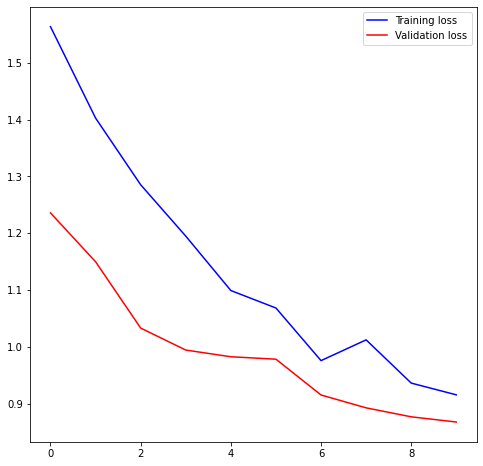

<Figure size 432x288 with 0 Axes>

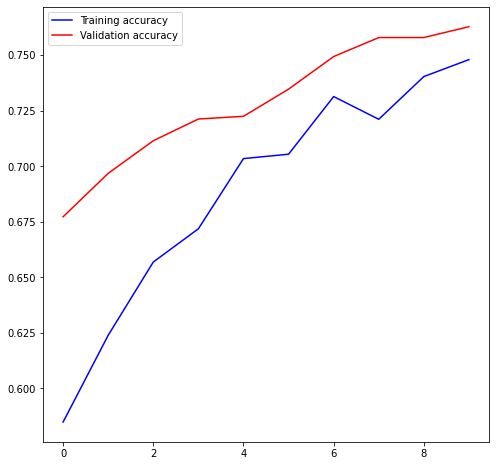

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("{path_colab_drive}/model/model.h5")

## Dự đoán

In [ ]:
model_path = f'{path_colab_drive}/model/model.h5'

In [ ]:
library_path = f'{path_colab_drive}/cat_to_name.json'

In [ ]:
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

def predict_class_img_with_img(img_path):
    class_names = ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19', '2', '20', '21', '22', '23', '24',
                   '25', '26', '27', '28', '29', '3', '30', '31', '32', '33',
                   '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
                   '43', '44', '45', '46', '47', '48', '49', '5', '50', '51',
                   '52', '53', '54', '55', '56', '57', '58', '59', '6', '60',
                   '61', '62', '63', '64', '65', '66', '67', '68', '69', '7',
                   '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
                   '8', '80', '81', '82', '83', '84', '85', '86', '87', '88',
                   '89', '9', '90', '91', '92', '93', '94', '95', '96', '97',
                   '98', '99']

    # Load label library
    with open(library_path, 'r') as f:
      library = json.load(f)

    # load model
    model = load_model(model_path)
    img_arr = cv2.imread(img_path)
    np_img = np.array(img_arr)

    # print(np_img.shape)
    image = np.expand_dims(cv2.resize(np.squeeze(np_img), (160, 160)), axis=0)

    predictions = model.predict(image)
    scores = tf.nn.sigmoid(predictions)
    pred_labels = np.argmax(scores, axis=-1)

    class_name_key = class_names[int(pred_labels)]
    score = np.max(scores) * 100
    class_name = library[str(class_name_key)]

    print(f"Class is {class_name} (id is {class_name_key}), score is {score}%")
    cv2_imshow(image[0])

1/1 [==============================] - 1s 781ms/step
Class is toad lily (id is 79), score is 94.30687427520752%


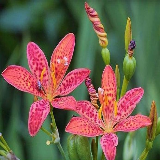

In [ ]:
img_path = '/content/data/valid/102/image_08002.jpg'
predict_class_img_with_img(img_path)